In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score

## Importing Data and Preprocessing

In [2]:
df = pd.read_csv(r"C:\Users\mobin\DATASIENCE\ML Assignments\STATISTICS\Decision Trees\Company.csv")

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
df.head(1)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.5,138,73,11,276,120,Bad,42,17,Yes,Yes


## CREATING A NEW COLUMN AND STANDERIZING THE DATA

In [9]:
# Creating a new column to classify the tree

avg = df.Sales.mean()   #7.496325000000001


def new_sale_catagory(x):
    if x>avg:
        return 'High'
    else:
        return 'Low'
        
df['SALE'] = df['Sales'].apply(new_sale_catagory)

In [10]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SALE
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [16]:

data = df.copy()
data['SALE'] = data['SALE'].astype("category")
data['SALE'].dtype

CategoricalDtype(categories=['High', 'Low'], ordered=False)

In [17]:
# Labeling the data to see the correlation between the columns

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['SALE']=encoder.fit_transform(data['SALE'])
data['US']=encoder.fit_transform(data['US'])
data['Urban']= encoder.fit_transform(data['Urban'])
data['ShelveLoc'] = encoder.fit_transform(data['ShelveLoc'])

In [18]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SALE
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1


In [19]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SALE
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,-0.015419,0.177093,-0.802045
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869,-0.035578
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601,-0.123460
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460,-0.251910
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564,-0.069327
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861,0.392275
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760,-0.106962
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652,0.186707
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250,0.028847
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085,0.047090


C:\Users\mobin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


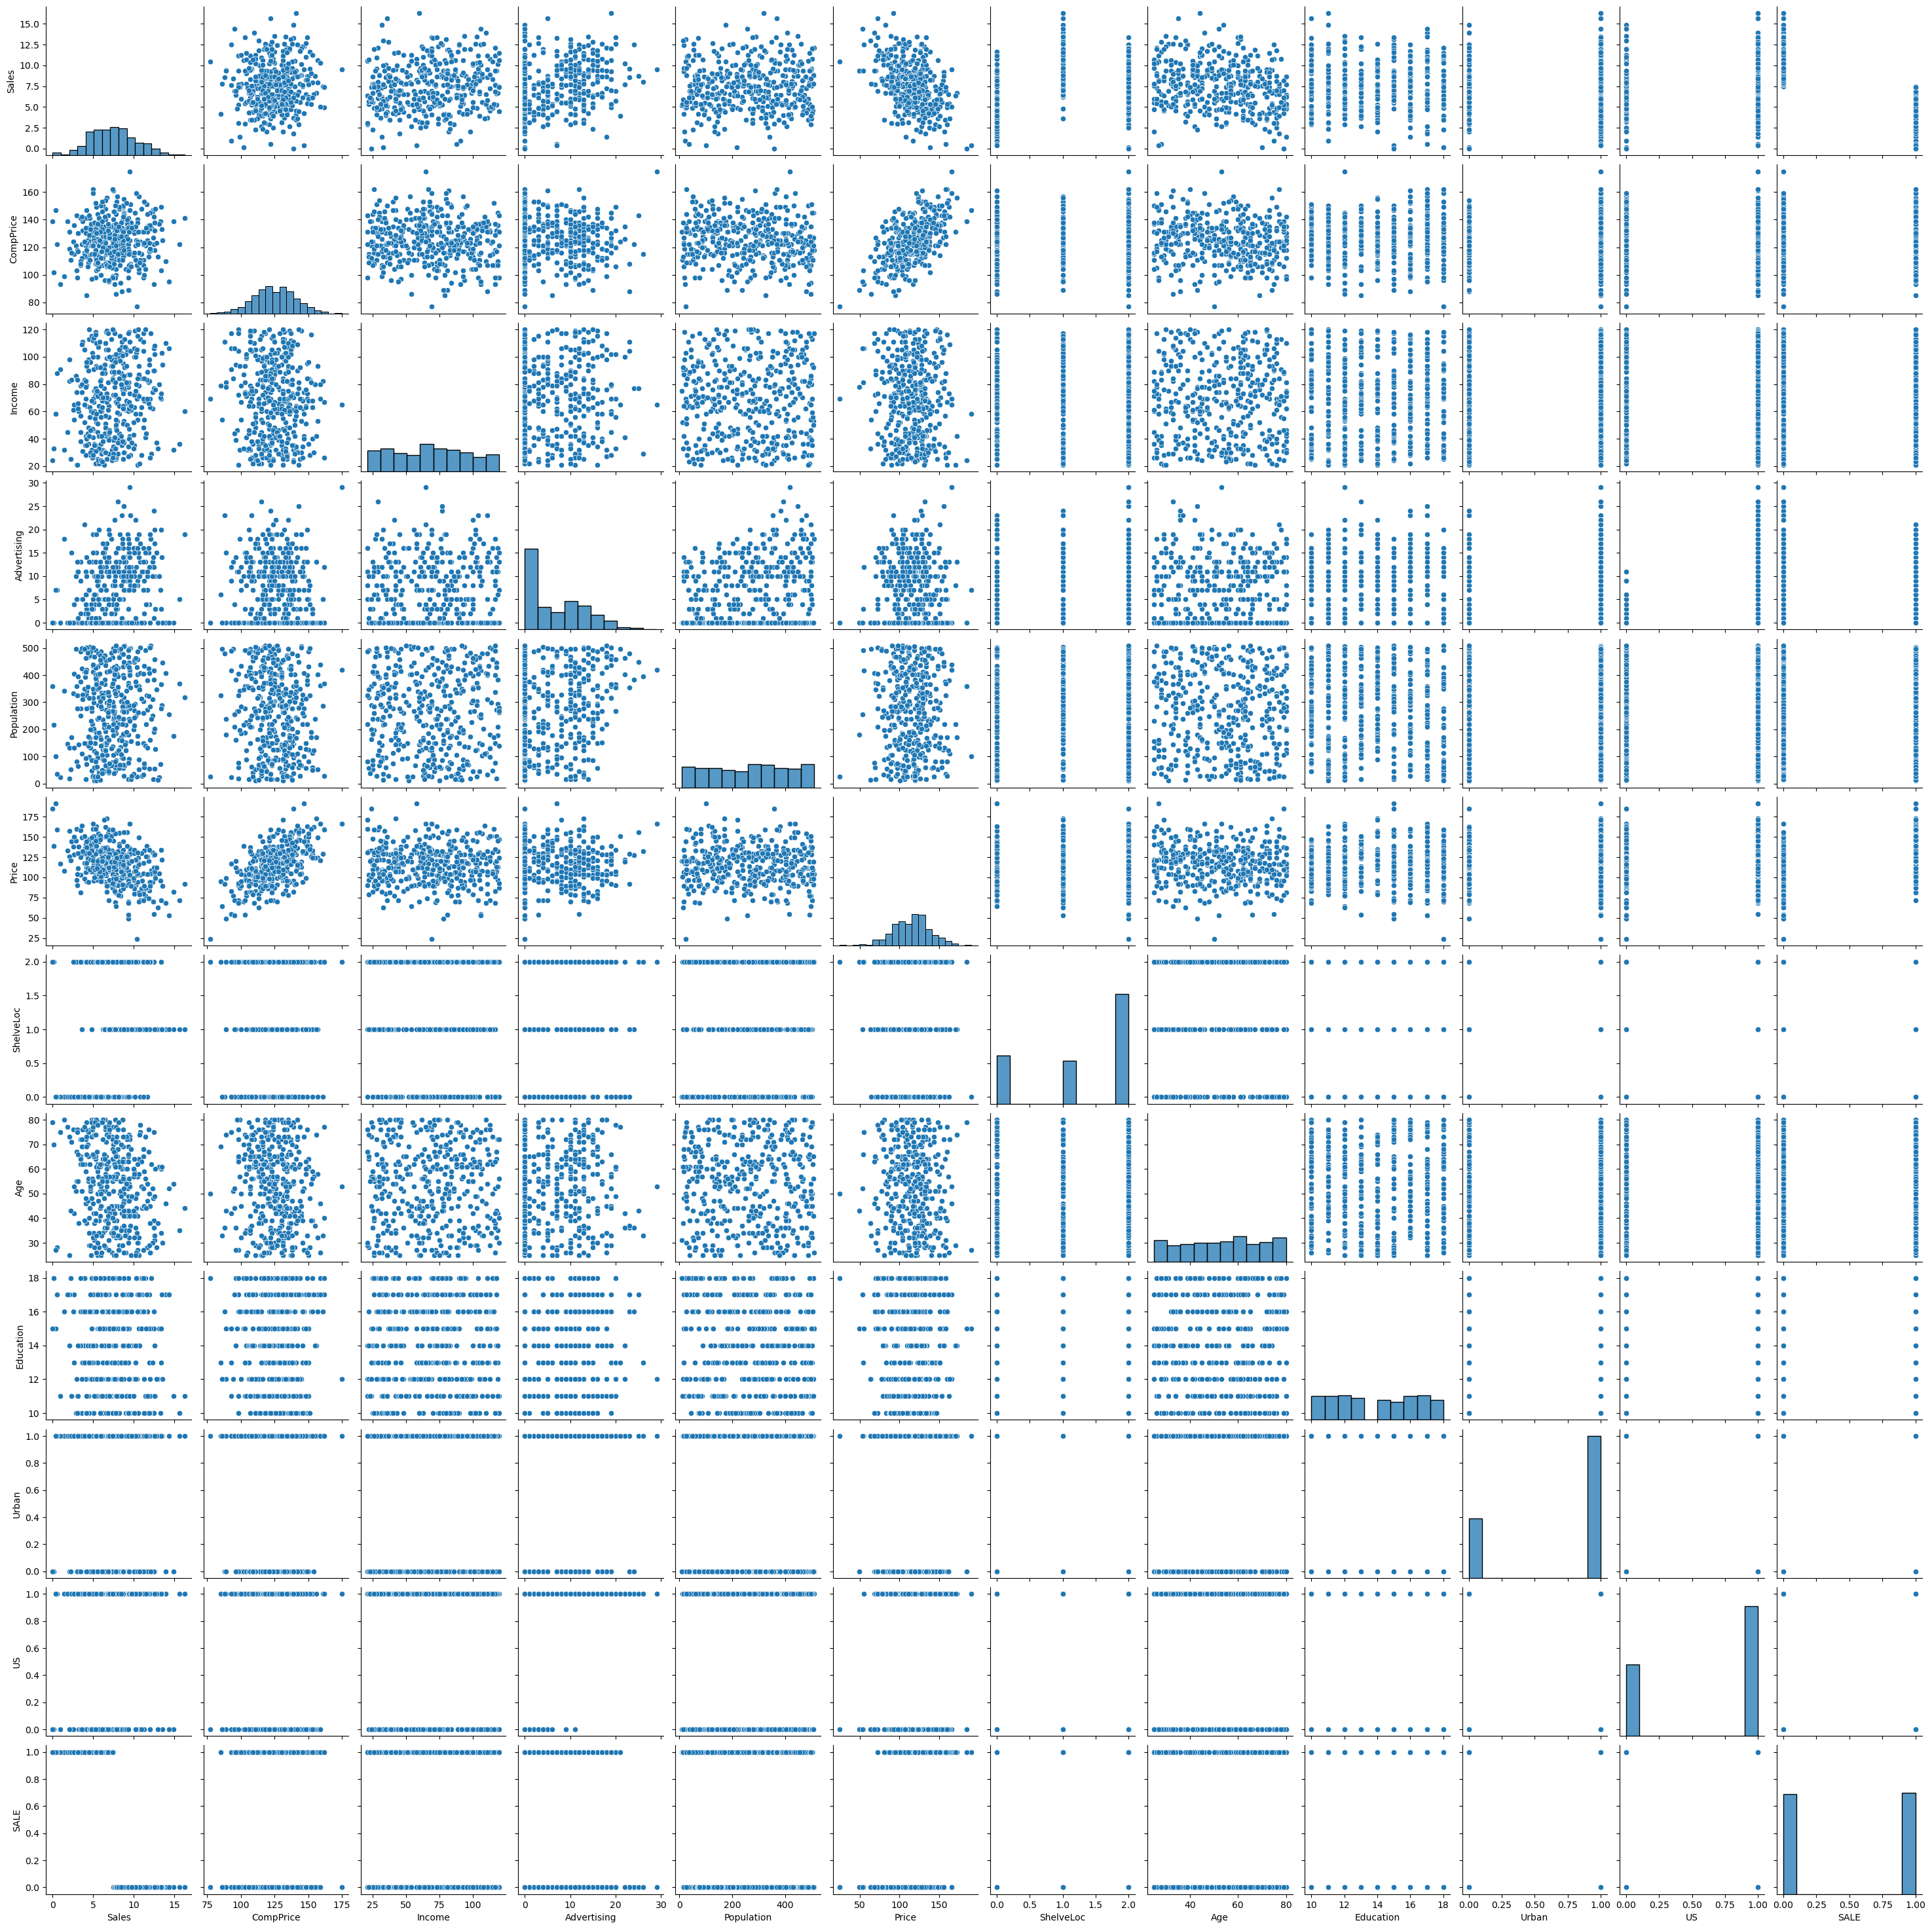

In [34]:
# visualizing the data correlation
import seaborn as sns

sns.pairplot(data)

In [20]:
## Preparing the data for decision tree model

data = data.drop('Sales', axis = 1)
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SALE
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [21]:
data.SALE.value_counts()

SALE
1    201
0    199
Name: count, dtype: int64

In [22]:
# Splitting the data in train and Test part
# spliting the data into input and traget variables 


X = data.drop('SALE', axis =1)
Y = data['SALE']

In [23]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [25]:
Y = Y.astype('category')

In [26]:
Y.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [27]:
# Dividing data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state= 15)


## CREATING A MODEL

In [42]:
model = DecisionTreeClassifier(criterion='entropy' , max_depth= 4)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [43]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

Text(0.5, 1.0, 'Accuracy Score: 0.7125')

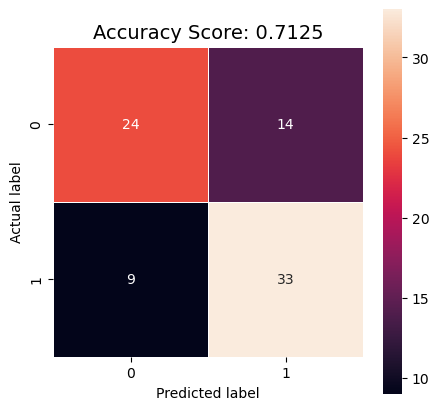

In [44]:
# Using Confusion Metrics to look at right and wrong predictions

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(X_test, Y_test))
plt.title(all_sample_title, size = 14)

## PLOTING TREE

In [46]:

plt.figure(dpi = 2000)
tree.plot_tree(model)

[Text(0.4625, 0.9, 'x[4] <= 101.5\nentropy = 1.0\nsamples = 320\nvalue = [161, 159]'),
 Text(0.25, 0.7, 'x[0] <= 123.5\nentropy = 0.776\nsamples = 83\nvalue = [64, 19]'),
 Text(0.2, 0.5, 'x[5] <= 0.5\nentropy = 0.895\nsamples = 61\nvalue = [42, 19]'),
 Text(0.1, 0.3, 'x[1] <= 80.0\nentropy = 0.985\nsamples = 21\nvalue = [9, 12]'),
 Text(0.05, 0.1, 'entropy = 0.722\nsamples = 15\nvalue = [3, 12]'),
 Text(0.15, 0.1, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.3, 0.3, 'x[4] <= 92.5\nentropy = 0.669\nsamples = 40\nvalue = [33, 7]'),
 Text(0.25, 0.1, 'entropy = 0.235\nsamples = 26\nvalue = [25, 1]'),
 Text(0.35, 0.1, 'entropy = 0.985\nsamples = 14\nvalue = [8, 6]'),
 Text(0.3, 0.5, 'entropy = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.675, 0.7, 'x[5] <= 0.5\nentropy = 0.976\nsamples = 237\nvalue = [97, 140]'),
 Text(0.55, 0.5, 'x[4] <= 129.5\nentropy = 0.516\nsamples = 52\nvalue = [6, 46]'),
 Text(0.5, 0.3, 'x[2] <= 18.5\nentropy = 0.696\nsamples = 32\nvalue = [6, 26]'),
 Text